## Data Preprocessing

In [1]:

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)

df['MedHouseVal'] = housing.target



print(df.isnull().sum())



X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']



scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


## Correlation Heatmap

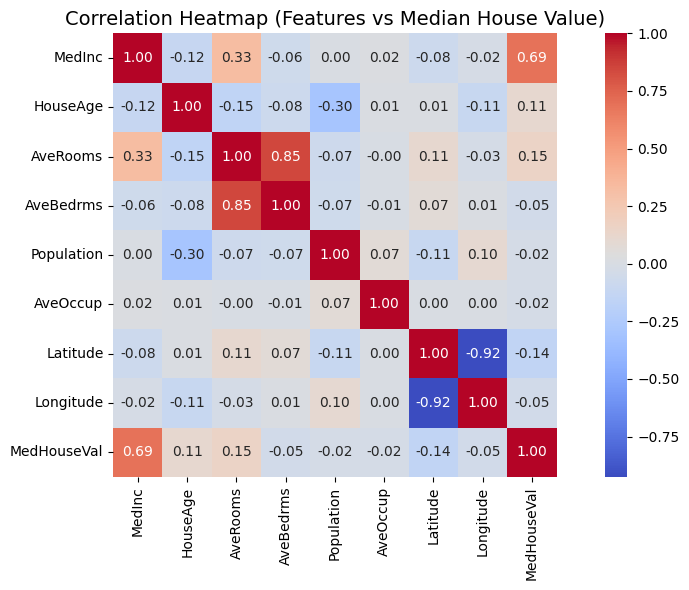

In [2]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap (Features vs Median House Value)", fontsize=14)

plt.tight_layout()

plt.show()


##  Model Training and Hyperparameter Tuning

In [3]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [4]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Hyperparameter tuning for Decision Tree
dt_params = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='r2')

dt_grid.fit(X_train, y_train)

print("Best Params (Decision Tree):", dt_grid.best_params_)

print("Best CV Score (Decision Tree):", dt_grid.best_score_)

# Replacing model with the tuned one:
dt = dt_grid.best_estimator_


Best Params (Decision Tree): {'max_depth': 10, 'min_samples_split': 10}
Best CV Score (Decision Tree): 0.6965681952293667


In [5]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score

# RF Hyperparameters
rf_params = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', verbose=1, n_jobs=-1)

rf_grid.fit(X_train, y_train)

print("Best Params (RF):", rf_grid.best_params_)

print("Best CV Score (RF):", rf_grid.best_score_)

# Using best model
rf = rf_grid.best_estimator_


rf_cv = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print("RF CV R² mean:", rf_cv.mean())



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params (RF): {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best CV Score (RF): 0.8051420548611006
RF CV R² mean: 0.8051420548611006


In [6]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42, n_estimators=100)

gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

In [8]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV

# Ridge Regression (Linear Regression + L2 penalty)
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2')

grid_ridge.fit(X_train, y_train)

ridge = grid_ridge.best_estimator_

print("Best Ridge Regression Parameters:", grid_ridge.best_params_)


Best Ridge Regression Parameters: {'alpha': 0.1}


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

# GBR GridSearchCV
gb_params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=5, scoring='r2', verbose=1, n_jobs=-1)

gb_grid.fit(X_train, y_train)

print("Best Params (GBR):", gb_grid.best_params_)

print("Best CV Score (GBR):", gb_grid.best_score_)

# Using best model
gb = gb_grid.best_estimator_


gb_cv = cross_val_score(gb, X_train, y_train, cv=5, scoring='r2')

print("GBR CV R² mean:", gb_cv.mean())


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params (GBR): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Best CV Score (GBR): 0.8272956766172795
GBR CV R² mean: 0.8272956766172795


In [10]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)


SVR()

In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score

# SVR GridSearchCV
svr_params = {
    'C': [1, 10],
    'epsilon': [0.1, 0.2],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

svr_grid = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2', verbose=1, n_jobs=-1)

svr_grid.fit(X_train, y_train)

print("Best Params (SVR):", svr_grid.best_params_)

print("Best CV Score (SVR):", svr_grid.best_score_)

# Using best model
svr = svr_grid.best_estimator_


svr_cv = cross_val_score(svr, X_train, y_train, cv=5, scoring='r2')

print("SVR CV R² mean:", svr_cv.mean())


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params (SVR): {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score (SVR): 0.7605767515760357
SVR CV R² mean: 0.7605767515760357


##  Model Evaluation (MSE, MAE, R²)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'Linear Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Support Vector Regressor': svr
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2 Score': r2})

# Create DataFrame
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)

print(results_df)


                      Model       MSE       MAE  R2 Score
3         Gradient Boosting  0.231639  0.320987  0.823231
2             Random Forest  0.255297  0.327736  0.805178
4  Support Vector Regressor  0.319353  0.378544  0.756295
1             Decision Tree  0.416580  0.434055  0.682099
0         Linear Regression  0.555892  0.533200  0.575788


## Visual Comparison of Model Performance

<ipython-input-13-d58faa856575>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='R2 Score', y='Model', palette='viridis')


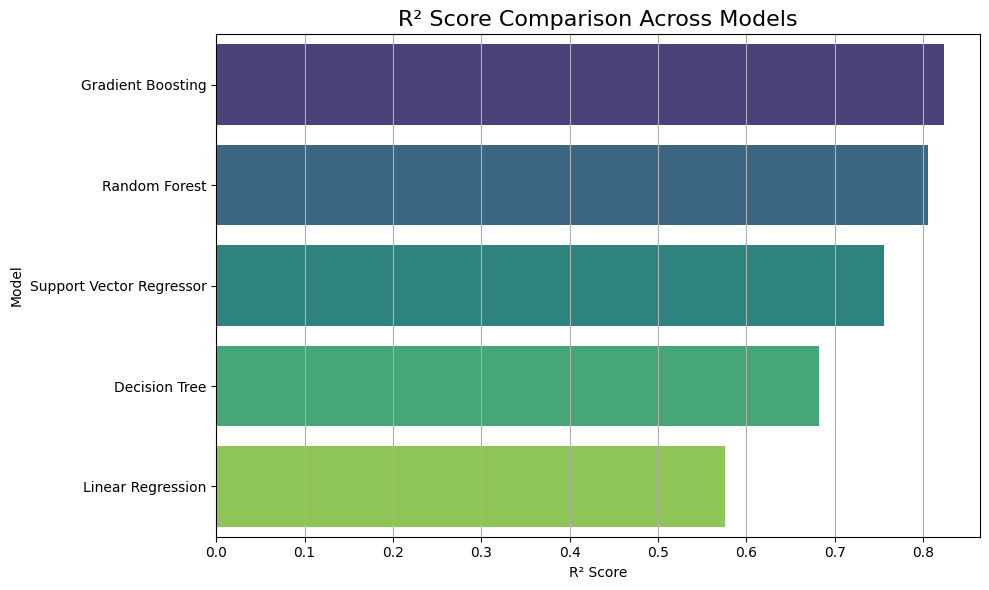

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='R2 Score', y='Model', palette='viridis')

plt.title('R² Score Comparison Across Models', fontsize=16)

plt.xlabel('R² Score')

plt.ylabel('Model')

plt.grid(axis='x')

plt.tight_layout()

plt.show()


## Feature Importance (Random Forest)

<ipython-input-14-b7edeb0a8637>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='crest')


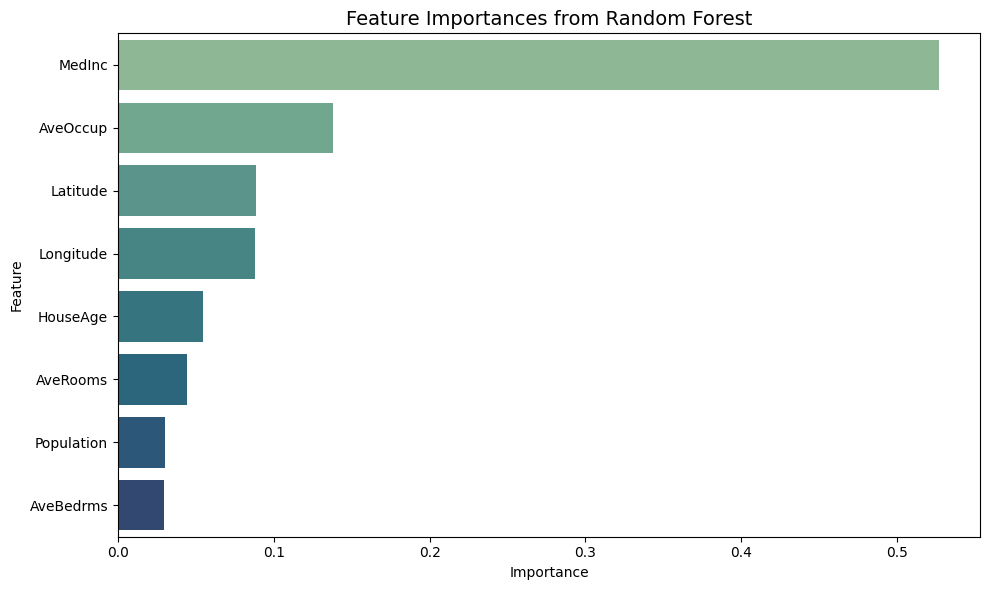

In [14]:
# Feature Importance (Random Forest)
importances = rf.feature_importances_

feature_names = df.drop('MedHouseVal', axis=1).columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='crest')

plt.title("Feature Importances from Random Forest", fontsize=14)

plt.tight_layout()
plt.show()



## Conclusion: Best & Worst Performing Models

- **Best Model**:  **Random Forest** and **Gradient Boosting**, due to their ability to capture complex patterns and reduce overfitting through ensemble techniques.
-  **Worst Model**: **SVR** (slow on large datasets, less efficient without tuning), and **Linear Regression** (too simple for non-linear housing data).


- Gradient Boosting was the best-performing model with an R² score of 0.82.
- Median Income is the most important feature for predicting housing prices.
- Linear Regression underperformed due to inability to capture nonlinear relationships.